# Applying PCA on Image Data


Importing modules

In [1]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import numpy as np
import os
from PIL import Image
import glob

Converting csv to jpg for one snapshot
1. Read in csv file
2. Convert to Image
3. Save Image

In [7]:
from numpy import genfromtxt
my_data = genfromtxt('preprocessing/subset/modified/Sc2_21_June_19_11_05_59.csv', delimiter=',')

im = Image.fromarray(my_data)
im = im.convert("L")
#im.save("Preprocessing/subset/Images/Sc2_21_June_19_11_05_59.jpg")

`Test if the csv file was save`

Read in the the new jpg file that we made

Our images are 399 x 798. The dimension of the images are going to be useful later on when do image analysis.



In [74]:
img = cv2.imread('preprocessing/subset/Images/Sc2_21_June_19_11_05_59.jpg', 0)
snapshot = pd.Series(img.flatten(), name = 'preprocessing/subset/Images/Sc2_21_June_19_11_05_59.jpg')

([], <a list of 0 Text yticklabel objects>)

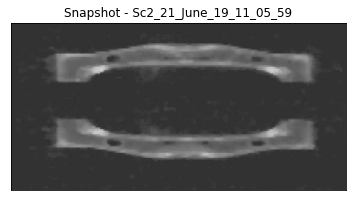

In [79]:
plt.imshow(img, cmap='gray', vmin = 0, vmax= 255)
plt.title("Snapshot - Sc2_21_June_19_11_05_59")
plt.xticks([])
plt.yticks([])

Now take we have done above for one image and generalize the operations to the images in our directory

*Change the **path** variable depending on where you stored your snapshots*

`Create jpg files from the csv files`

In [42]:
path = 'preprocessing/subset/modified' # use your path
all_files = glob.glob(os.path.join(path, '*.csv'))
for filename in all_files:
    my_data = genfromtxt(filename, delimiter=',')
    im = Image.fromarray(my_data)
    im = im.convert("L")
    filename = filename[30:-4]
    im.save("Preprocessing/subset/Images/" + filename + ".jpg")

1. Create a new dataframe

2. Read in each jpg file

3. Make each image (2D array) into a 1D array because PCA only works on 1D arrays

Each row should represent one snapshot

> 399 * 798 = 318,402 feature columns



In [2]:
from glob import iglob
snapshots = pd.DataFrame([])
for path in iglob('Preprocessing/subset/Images/*.jpg'):
    img = cv2.imread(path, 0)
    snapshot = pd.Series(img.flatten(), name = path)
    snapshots = snapshots.append(snapshot)
snapshots


,0,1,2,3,4,5,6,7,8,9,...,318392,318393,318394,318395,318396,318397,318398,318399,318400,318401
Preprocessing/subset/Images/Sc2_21_June_19_11_56_29.jpg,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
Preprocessing/subset/Images/Sc2_21_June_19_12_07_44.jpg,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
Preprocessing/subset/Images/Sc2_21_June_19_11_31_59.jpg,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
Preprocessing/subset/Images/Sc2_21_June_19_12_04_29.jpg,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
Preprocessing/subset/Images/Sc2_21_June_19_11_11_14.jpg,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Preprocessing/subset/Images/Sc2_21_June_19_12_20_30.jpg,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
Preprocessing/subset/Images/Sc2_21_June_19_12_05_59.jpg,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
Preprocessing/subset/Images/Sc2_21_June_19_11_06_29.jpg,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
Preprocessing/subset/Images/Sc2_21_June_19_11_09_44.jpg,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0


`Print all 100 snapshots.`

Each snapshot suppose to represent temperature data so I represented them as grayscale.

10 x 10 image of all 100 snapshots of the same part

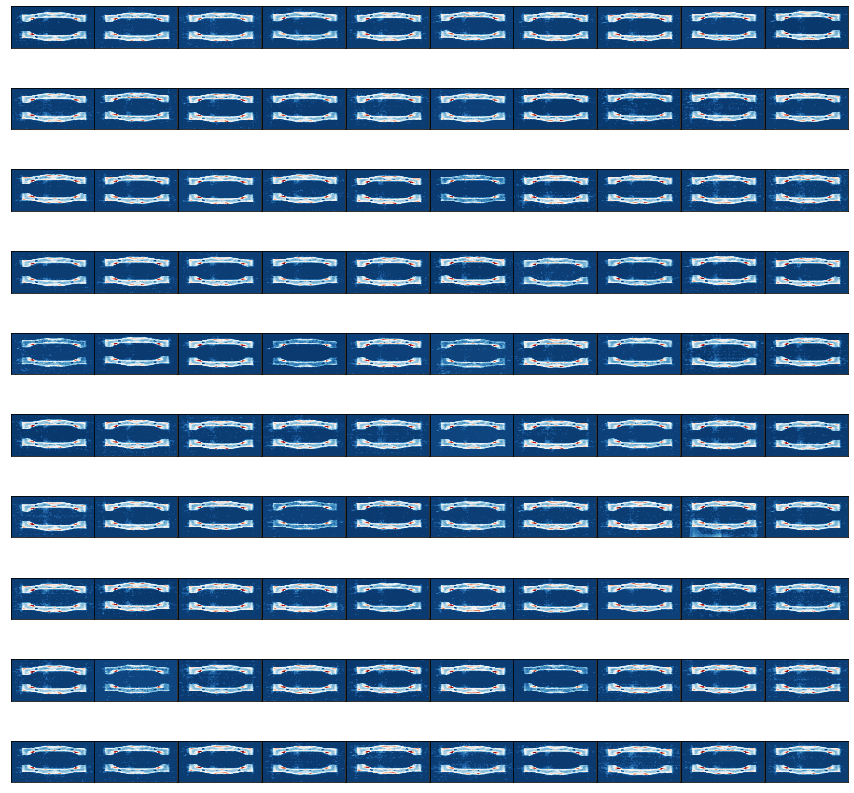

In [93]:
fig, axes = plt.subplots(10,10, figsize=(15,15),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(snapshots.iloc[i].values.reshape(399,798), cmap="RdBu_r")

Using the Sci-Kit module to perform PCA

In [65]:
from sklearn.decomposition import PCA 

Made a plot to show the number of components needed to represent the variance ratio of the entire dataset

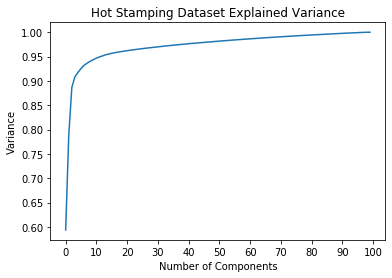

In [34]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(snapshots)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('Number of Components')
plt.ylabel('Variance') #for each component
plt.title('Hot Stamping Dataset Explained Variance')
plt.show()

We only need 13 components to represent 95% of data. Through PCA we are able to reduce 100 snapshots to only 13 new snapshots

In [66]:
pca = PCA(0.95).fit(snapshots)
pca.n_components_

13

Here are the images of the 13 new snapshots that can represent 95% of the variability of our dataset

IndexError: index 13 is out of bounds for axis 0 with size 13

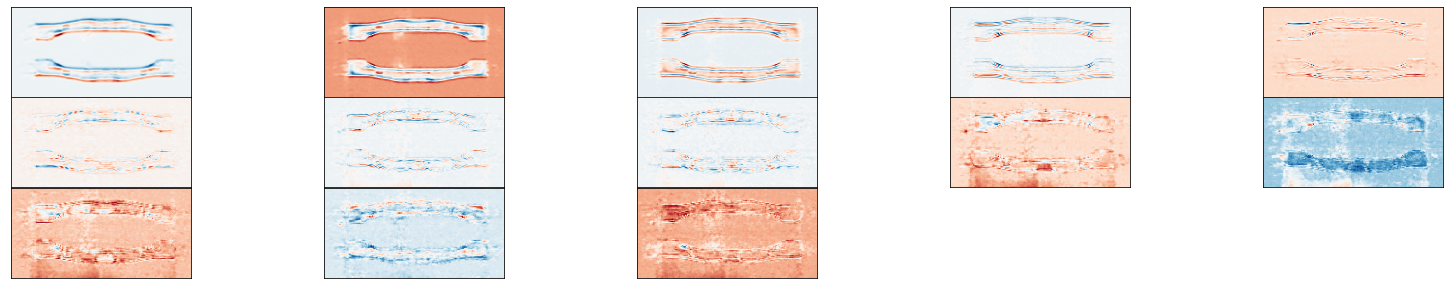

In [96]:
fig, axes = plt.subplots(3,5,figsize=(28,5),
     subplot_kw={'xticks':[], 'yticks':[]},
     gridspec_kw=dict(hspace=0.01, wspace=0.01))
fig.delaxes(axes[2][3])
fig.delaxes(axes[2][4])
for i, ax in enumerate(axes.flat):
     ax.imshow(pca.components_[i].reshape(399,798),cmap="RdBu_r")
     

In [68]:
#pca = PCA(13, svd_solver='randomized').fit(snapshots)
components = pca.transform(snapshots)
projected = pca.inverse_transform(components)

We can compare our *old images* to *new images* that are redrawn from the the primary components 

>The first ten images side by side

Text(0, 0.5, '13-dim\nreconstruction')

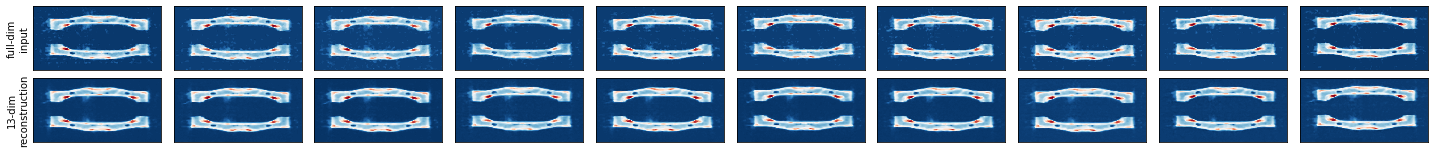

In [97]:
fig, ax = plt.subplots(2, 10, figsize=(25,2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(snapshots.iloc[i].values.reshape(399,798), cmap='RdBu_r')
    ax[1, i].imshow(projected[i].reshape(399,798), cmap='RdBu_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('13-dim\nreconstruction')

All 100 redrawn using 13 components.

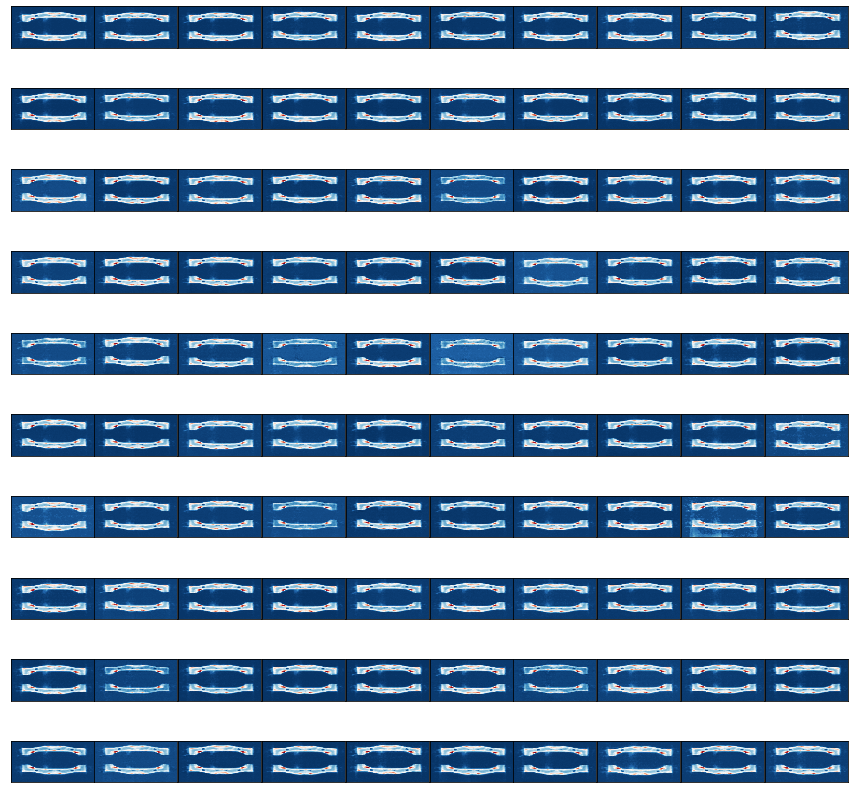

In [98]:
fig, axes = plt.subplots(10,10,figsize=(15,15), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(399,798),cmap="RdBu_r")

In [64]:
projected

array([[50.00432913, 50.00432913, 50.00282736, ..., 49.98557804,
        49.98034315, 49.98200674],
       [50.02178278, 50.02178278, 50.03354825, ..., 50.45115515,
        50.39653807, 50.41102302],
       [49.98319775, 49.98319775, 49.97317971, ..., 50.4164682 ,
        50.31812453, 50.31332679],
       ...,
       [49.92597312, 49.92597312, 49.90142358, ..., 50.07124769,
        50.00549439, 49.98498545],
       [50.17347864, 50.17347864, 50.24919726, ..., 50.15452653,
        50.21413251, 50.25766843],
       [49.98000634, 49.98000634, 49.93767302, ..., 49.71143232,
        49.53827353, 49.45491438]])